# Exercise 4.1: The expression for the period $T$ of a *realistic pendulum*, for which the maximum angle of displacement is $\theta_0$, when $\theta_0$ is not necessarily small, is given by:

$T = \frac{T_0}{\pi} \int_0^{\theta_0} \frac{ \mathrm{d} \theta } { [\sin^2 (\theta_0/2) - \sin^2 (\theta/2)]^{1/2}}$,

where $T_0$ is the period for small-angle oscillations. 

By expanding the denominator and integrating it term-by-term, we can obtain a series expansion for the period:

$T \simeq T_0 \left[ 1 + \left(\frac{1}{2}\right)^2 \sin^2 \frac{\theta_0}{2} + \left( \frac{1 \cdot 3}{2 \cdot 4}\right)^2 \sin^4 \frac{\theta_0}{2} + \left( \frac{1 \cdot 3 \cdot 5}{2 \cdot 4 \cdot 6}\right)^2 \sin^6 \frac{\theta_0}{2} ...\right]$.

The expansion tells us e.g. that an amplitude $\theta_0 = 80^\circ$ leads to a 10\% slowdown of the pendulum relative to the small $\theta$ result. 

We will determine the period computationally, without the need for any expansions. 

(a) Use numerical quadrature to determine the ratio $T/T_0$ for five values of $\theta_0$ in the interval $[0,\pi/2]$. Show that you have attained at least four places of accuracy by progressively increasing the number of integration points until changes occur only in the fifth place or beyond. 

(b) Use the power series to determine $T/T_0$. Continue summing terms until changes in the sum occur only in the fifth place, or beyond. 

(c) Plot the values you obtained for $T/T_0$ vs. $\theta_0$ for both the integral and power series solution. 

BONUS 10%:

(d) Use Scipy's ```scipy.integrate.quad``` to perform the integral at the same values. Plot these as well as a third answer.

Solution:

(a) Let's use gaussian quadrature to perform the integral for $\theta = \pi/10, \pi/5, 2\pi/5, 3\pi/5, 4\pi/5$. We will copy the Gaussian quadrature formula from the lectures.

In [10]:
import math
import numpy as np
import scipy # we need scipy for the N-th order Legendre polynomials. 
from functools import partial # partial functions allow us to fix a certain number of arguments of a function and generate a new function.

# higher-order function that implements N-th order Gaussian quadrature:
def gauss(func, a, b, N):
    """Calculates the numerical integral of a function in the interval a,b using N-th order Gaussian quadrature"""
    # N-th order Gaussian quadrature 
    # get the weights and points from the scipy special function:
    xi, wi = scipy.special.roots_legendre(int(N))
    # now use the general formula to get the integral:
    integral = 0
    for j, wj in enumerate(wi):
        # calculate the x value using the xi array:
        xj = 0.5*((b-a) * xi[j] + b + a) # transform the xi[j] to the function argument, xj
        integral = integral + wj * func(xj)
    return (b-a)/2 * integral


# define the function for the integrand, solving for T/T_0 first:
def periodintegrand(th, thz):
    """Function that returns the integrand for the period of a realistic pendulum"""
    return (1/np.pi)/np.sqrt( np.power(np.sin(thz/2),2) - np.power(np.sin(th/2),2) )

# Let's first fix thetazero and find out the order of the Gaussian integration necessary to get four decimal points of accuracy.
thetazero_test = np.pi/2
Integrand_test = partial(periodintegrand, thz=thetazero_test)
Narray = np.arange(1,1000)
Result_test = []
previous = 0
current = 1E99
N = 0
while abs(current - previous) > 1E-5:
    N = N + 1
    previous = current
    current = gauss(Integrand_test,0,thetazero_test,N)
print('N for 4 decimal places=', N)

N for 4 decimal places= 222


In [1]:
# now let's perform the integral for specific values of thetazero:
thetazero_array = [np.pi/20, np.pi/10, np.pi/5, np.pi/4, np.pi/3, 2*np.pi/5]

I_gauss = [] # put the results in here
for thetazero in thetazero_array: # loop over the thetazero values
    Integrand = partial(periodintegrand, thz=thetazero) # construct a partial function for each thetazero
    I_gauss.append(gauss(Integrand,0,thetazero,N)) # do the integration and put the result in the list

NameError: name 'np' is not defined

(b) Now let's use the power series expansion to calculate the period for the same values of $\theta_0$. 

We start by constructing a function that spits out the first $n$ terms of the power series (not necessary, but neat!).

In [6]:
def period_powerseries(n, thz):
    """Calculates the period of a realistic pendulum using a power series expansion"""
    result = 0 # this will be the result 
    # we need to construct the n first coefficients of the power series
    # the numerator is 1 * 3 * 5 * ... i.e., the product of the first n odd numbers
    # and the denominator is 2 * 4 * 6 * ... i.e. the product of the first n even numbers
    numbers = np.arange(1,n*2+1)
    oddnumbers = [x for x in numbers if x%2!=0]
    evennumbers = [y for y in numbers if y%2==0 ]
    # we can now construct the power series:
    for i in range(n):
        # get the coefficients of the power series expansion:
        coeff = 1
        for j in range(i):
            coeff = coeff * oddnumbers[j]/evennumbers[j]
        # now add the term to the power series:
        result = result + coeff**2 * np.power(np.sin(thz/2),2*i)
    return result 

# perform the same test as for the Gaussian quadrature to see how many terms we need to get an accuracy of four decimal points:
n = 0
previous = 0
current = 1E99
while abs(current - previous) > 1E-5:
    n = n + 1
    previous = current
    current = period_powerseries(n, 2*np.pi/5)
print('n for 4 decimal places=', n)

n for 4 decimal places= 9


So we need these many terms to get 4 decimal places. Let's now calculate the period for the same values of the amplitude as before: 

In [7]:
I_powerseries = [period_powerseries(n, t) for t in thetazero_array]

(c) And now let's plot the results: ```I_gauss``` and ```I_powerseries``` for the values in ```thetazero_array```:

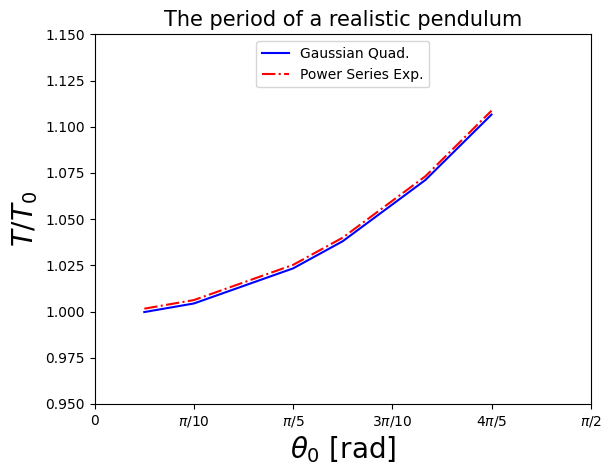

In [19]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$\theta_0$ [rad]', fontsize=20) # set the x label
ax.set_ylabel(r'$T/T_0$', fontsize=20) # set the y label
ax.set_title('The period of a realistic pendulum', fontsize=15) # set the title 

# set the x and y limits:
ax.set_xlim(0, np.pi/2)
ax.set_ylim(0.95,1.15)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
ax.plot(thetazero_array, I_gauss, color='blue', linestyle='-', label='Gaussian Quad.') 
ax.plot(thetazero_array, I_powerseries, color='red', linestyle='-.', label='Power Series Exp.') 

# change the axis labels to correspond to [0, pi/10, pi/5, 3pi/10, 2pi/5, pi/2]
ax.set_xticks([0, math.pi/10, math.pi/5, 3* math.pi/10, 2*math.pi/5, math.pi/2])
ax.set_xticklabels(['0', '$\\pi/10$', '$\\pi/5$', '$3\\pi/10$', '$4\\pi/5$', '$\\pi/2$'])


# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here

(d) Let's compare our results to the ```scipy.integrate.quad``` function.

In [9]:
I_scipy = [] # put the results in here
for thetazero in thetazero_array: # loop over the thetazero values
    Integrand = partial(periodintegrand, thz=thetazero) # construct a partial function for each thetazero
    # grab only the first element in the array: 
    I_scipy.append(scipy.integrate.quad(Integrand, 0, thetazero)[0]) # do the integration and put the result in the list
    

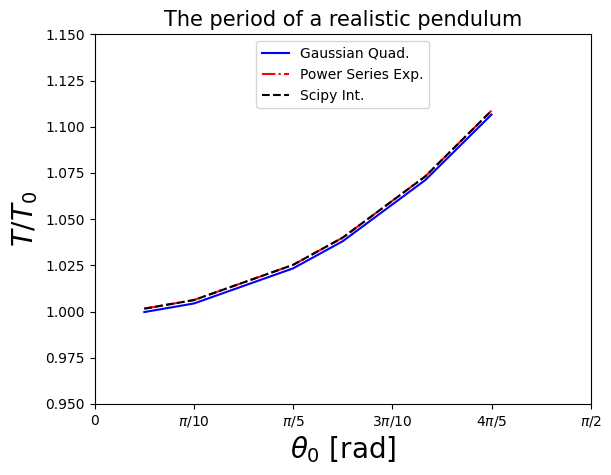

In [18]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$\theta_0$ [rad]', fontsize=20) # set the x label
ax.set_ylabel(r'$T/T_0$', fontsize=20) # set the y label
ax.set_title('The period of a realistic pendulum', fontsize=15) # set the title 

# set the x and y limits:
ax.set_xlim(0, np.pi/2)
ax.set_ylim(0.95,1.15)

# make one-dimensional plots using the above arrays, add a custom label, linestyles and colors:
ax.plot(thetazero_array, I_gauss, color='blue', linestyle='-', label='Gaussian Quad.') 
ax.plot(thetazero_array, I_powerseries, color='red', linestyle='-.', label='Power Series Exp.') 
ax.plot(thetazero_array, I_scipy, color='black', linestyle='--', label='Scipy Int.') 

# change the axis labels to correspond to [0, pi/10, pi/5, 3pi/10, 2pi/5, pi/2]
ax.set_xticks([0, math.pi/10, math.pi/5, 3* math.pi/10, 2*math.pi/5, math.pi/2])
ax.set_xticklabels(['0', '$\\pi/10$', '$\\pi/5$', '$3\\pi/10$', '$4\\pi/5$', '$\\pi/2$'])

# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here